<a href="https://colab.research.google.com/github/lily-larson/MGMT-467-Analytics-Portfolio/blob/main/Labs/Week5_DataViz_Dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MGMT 467 — Week 5: Data Visualization & Dashboarding

Instructor: **Prof. Alok R. Chaturvedi**  
Modality: **Guided Inquiry (Tuesday)** + **Hands-on Lab (Thursday)**  
Prepared: 2025-09-23  

---
### Learning Objectives
1. Distinguish **exploratory** vs **explanatory** visualization.  
2. Match common **chart types** to the **questions** they answer.  
3. Design **airline KPIs** and select appropriate visuals.  
4. Use **Gemini** to generate Matplotlib/Seaborn code in Colab.  
5. Build an **interactive dashboard** in Looker Studio using BigQuery/CSV.


## Tuesday (Concepts) — Guided Inquiry

**Instructions:** Answer directly in this notebook. Use short paragraphs and bullet points. When helpful, sketch chart ideas using ASCII or quick scribbles.

### Q1 — Exploratory vs. Explanatory
**Prompt:** *"Explain the difference between exploratory and explanatory visualization."*  
**Hints:** Consider audience, purpose, level of polish, and how much iteration you expect.

📝 **Your response:**

-Exploratory visualizations are typically intended only for the data anlyst. They give a general understanding of the data and a preliminary idea of any patterns present.

-Explanatory visualizations are generally inteded to be viewed by a broader audience, possibly including people with very little understanding of data analytics.

-Explanatory visualizations need to be much more polished, clear, and easily interpretable. It may also be helpful to double check that they are not easily mis-interpreted.

---
### Q2 — Chart Types & When to Use Them
**Prompt:** *"Describe 5 common chart types (e.g., bar, line, scatter, histogram, map) and the type of data analysis question each is best suited to answer."*  

For each chart, list: **Question archetype**, **Data shape**, **Pitfalls**, **Alternatives**.

📝 **Your response (template):**
1. **Bar:**  
   - Question archetype: How do categories compare?
   - Data shape: categorical groups with numeric values
   - Pitfalls: too many cateogires or inconsistent ordering makes them unreadable
   - Alternatives: column chart, lollipop chart
2. **Line:**  

    - Question archetype: How does something change over time?
   - Data shape: continuous x-axis with numeric response values
   - Pitfalls: uneven time intervals can be misleading
   - Alternatives: area chart, slope chart
3. **Scatter:**  

    - Question archetype: What is the relationship between two variables?
   - Data shape: pairs of numeric values
   - Pitfalls: overplotting when points are stacked on top of each other
   - Alternatives: bubble chart
4. **Histogram:**  

    - Question archetype: What is the distribution of this variable?
   - Data shape: single continuous variable divided into bins
   - Pitfalls: bin widths can distort interpretation
   - Alternatives: density plot, box plot
5. **Map:**  

    - Question archetype: How does this measure change with geography?
   - Data shape: geospatial data keyed to regions
   - Pitfalls: misleading by area size
   - Alternatives: heatmap
---
### Q3 — Airline Executive Dashboard KPIs
**Prompt:** *"Your goal is to create a dashboard for an airline executive. Brainstorm 5 Key Performance Indicators (KPIs) that should be on this dashboard. For each KPI, suggest the best chart type to visualize it."*

Suggested KPI ideas to consider (customize them): On-Time Rate, Average Delay Minutes, Cancellation Rate, Load Factor, Yield (Revenue per Passenger Mile), Completion Factor, Net Promoter Score (if available), Revenue, Cost per Available Seat Mile (CASM).

📝 **Your response (template):**
1. KPI: On-time arrival rate
   - Why it matters: customer satisfaction and operational efficiency hinge on flights arriving when scheduled
   - Best chart: line chart over time
   - Drill-down fields: route, airport
2. KPI: Average Delay Minutes

    - Why it matters: reveals operational bottlenecks
   - Best chart: bar chart of average delay by cause
   - Drill-down fields: airport, time of day
3. KPI: Cancellation Rate

    - Why it matters: impacts revenue and customer trust
   - Best chart: column chart comparing monthly cancellation rates
   - Drill-down fields: seasonality, route, airport

4. KPI: Load Factor

    - Why it matters: shows how efficiently seating capacity is used
    - Best chart type: heatmap by route and month
    - Drill-down fields: route, cabin class

5. KPI: Yield (Revenue per Passenger Mile)

    - Why it matters: profitability measure to balance revenue and passenger demand
    - Best chart type: line chart with rolling averages by month
    - Drill-down fields: region, cabin class, booking channel


---
## Thursday (Practice) — Colab, Gemini, & Looker Studio

You will:
1) Use **Gemini** in Colab to generate visualization code (Matplotlib/Seaborn).  
2) Use a **synthetic airline dataset** (provided below) *or* connect your own BigQuery data.  
3) Build a **Looker Studio** dashboard for your KPIs.

### Option A — Use Gemini Side Panel in Colab
Open the **Gemini** side panel in Colab ("Extensions" or the right sidebar). Ask it to generate Python code given your prompts and the DataFrame you have in memory. Paste/execute the generated code in new cells.

### Option B — Programmatic Gemini (optional)
If you prefer code, you can install the Generative AI SDK and call Gemini with an API key. (We will not store keys in this notebook.)

> **Reminder:** This course emphasizes **AI-assisted coding**—focus on specifying *clear prompts* and then **reviewing and editing** the generated code for correctness, readability, and ethics.


In [ ]:
# (Optional) Environment setup — run if needed
%%capture
!pip install pandas numpy matplotlib seaborn pyarrow db-dtypes google-cloud-bigquery -q

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
np.random.seed(42)
print('✅ Environment ready')

### Create a Synthetic Airline Dataset (if you don't have one)
Use this dataset to prototype visualizations and dashboards. It contains realistic columns for the KPIs you defined. You can always swap in your BigQuery data later.


In [ ]:
# Generate a synthetic airline dataset
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

np.random.seed(467)

dates = pd.date_range(start='2024-01-01', end='2024-06-30', freq='D')
carriers = ['AA', 'DL', 'UA', 'WN', 'AS']
origins = ['ATL','DFW','DEN','ORD','LAX','SEA','SFO','PHX','CLT','MCO']
dests =   ['JFK','LGA','BOS','SFO','LAX','SEA','MIA','IAH','IAD','PHL']

rows = []
for d in dates:
    for carrier in carriers:
        # number of flights per day per carrier
        n = np.random.randint(80, 140)
        for _ in range(n):
            o = np.random.choice(origins)
            de = np.random.choice(dests)
            if o == de:
                continue
            distance = np.random.randint(300, 2800)
            seats = np.random.choice([90,120,150,180,210])
            load_factor = np.clip(np.random.normal(0.82, 0.07), 0.55, 0.98)
            pax = int(seats * load_factor)
            dep_delay = int(np.random.normal(8, 15))
            arr_delay = dep_delay + int(np.random.normal(0, 12))
            dep_delay = max(dep_delay, -5)
            arr_delay = max(arr_delay, -10)
            cancelled = np.random.rand() < 0.025
            diverted = np.random.rand() < 0.005
            revenue = pax * np.random.uniform(120, 420)
            casm = np.random.uniform(0.08, 0.16)  # cost per available seat mile
            cost = casm * seats * distance
            fuel_burn = distance * np.random.uniform(3.0, 4.5)  # gallons per seat-mile proxy
            nps = np.random.normal(35, 15)  # if you want a customer metric proxy
            rows.append({
                'date': d,
                'carrier': carrier,
                'origin': o,
                'dest': de,
                'distance_miles': distance,
                'seats': seats,
                'passengers': pax,
                'dep_delay_min': dep_delay,
                'arr_delay_min': arr_delay,
                'cancelled': int(cancelled),
                'diverted': int(diverted),
                'revenue_usd': round(revenue, 2),
                'cost_usd': round(cost, 2),
                'fuel_burn_gal': round(fuel_burn, 1),
                'nps': round(nps, 1)
            })

df_flights = pd.DataFrame(rows)

# Derived KPIs
df_flights['on_time'] = (df_flights['arr_delay_min'] <= 15).astype(int)
df_flights['load_factor'] = (df_flights['passengers'] / df_flights['seats']).round(3)
df_flights['yield_usd_per_pax_mile'] = (df_flights['revenue_usd'] / (df_flights['passengers'] * df_flights['distance_miles']).clip(lower=1)).round(4)
df_flights['asm'] = df_flights['seats'] * df_flights['distance_miles']  # available seat miles
df_flights['casm'] = (df_flights['cost_usd'] / df_flights['asm']).round(4)
df_flights['month'] = df_flights['date'].dt.to_period('M').astype(str)

df_flights.head()

,date,carrier,origin,dest,distance_miles,seats,passengers,dep_delay_min,arr_delay_min,cancelled,...,revenue_usd,cost_usd,fuel_burn_gal,nps,on_time,load_factor,yield_usd_per_pax_mile,asm,casm,month
0,2024-01-01,AA,LAX,IAH,444,180,160,-5,-10,0,...,26076.49,8301.98,1904.6,53.4,1,0.889,0.3671,79920,0.1039,2024-01
1,2024-01-01,AA,SEA,PHL,601,150,141,10,7,0,...,17561.91,8739.75,2237.5,60.9,1,0.940,0.2072,90150,0.0969,2024-01
2,2024-01-01,AA,LAX,IAD,749,120,100,13,22,0,...,15355.61,12241.65,3076.5,54.1,0,0.833,0.2050,89880,0.1362,2024-01
3,2024-01-01,AA,DFW,BOS,2153,210,169,13,14,0,...,42122.37,65961.23,6642.2,37.0,1,0.805,0.1158,452130,0.1459,2024-01
4,2024-01-01,AA,CLT,SEA,558,90,75,9,-5,0,...,26418.88,7144.23,2142.3,56.3,1,0.833,0.6313,50220,0.1423,2024-01


### Use Gemini to Generate Visualization Code
Copy/paste these **prompts** into Gemini (Colab side panel). After it generates code, paste it into a new cell and run. **Inspect and fix** anything that looks off.

#### Prompt A — On-Time Rate by Carrier (Bar Chart)
```
You are a Python data viz expert. Given a pandas DataFrame `df_flights` with columns including `carrier` and `on_time` (1/0), write Matplotlib/Seaborn code to compute and plot **On-Time Rate by carrier** as a sorted bar chart with percentage labels on bars. Use a clean style, readable labels, and tight layout. Do not use Plotly.
```

#### Prompt B — Average Arrival Delay over Time (Line Chart)
```
Given `df_flights` with `date` (datetime) and `arr_delay_min`, write code to aggregate to daily average arrival delay and plot a **line chart** with a 7-day rolling average overlay. Add axis labels, title, and grid.
```

#### Prompt C — Delay Distribution (Histogram)
```
Given `df_flights` with `arr_delay_min`, write code to plot a **histogram** of arrival delays with appropriate bins, a vertical reference line at 0, and annotate percent of flights within [-5, 15] minutes.
```

#### Prompt D — Load Factor by Route (Top 15) (Horizontal Bar)
```
Given `df_flights` with `origin`, `dest`, and `load_factor`, compute mean load factor by route (origin-dest pair), take the top 15 routes by average load factor, and plot a **horizontal bar chart**. Ensure long labels are readable.
```

#### Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
```
Given `df_flights` with `cost_usd`, `revenue_usd`, and `casm`, produce a **scatter plot** of cost vs. revenue with points colored by `casm` (continuous colormap) and add a diagonal y=x reference line. Include labels and legend.
```


/tmp/ipython-input-3998501325.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')


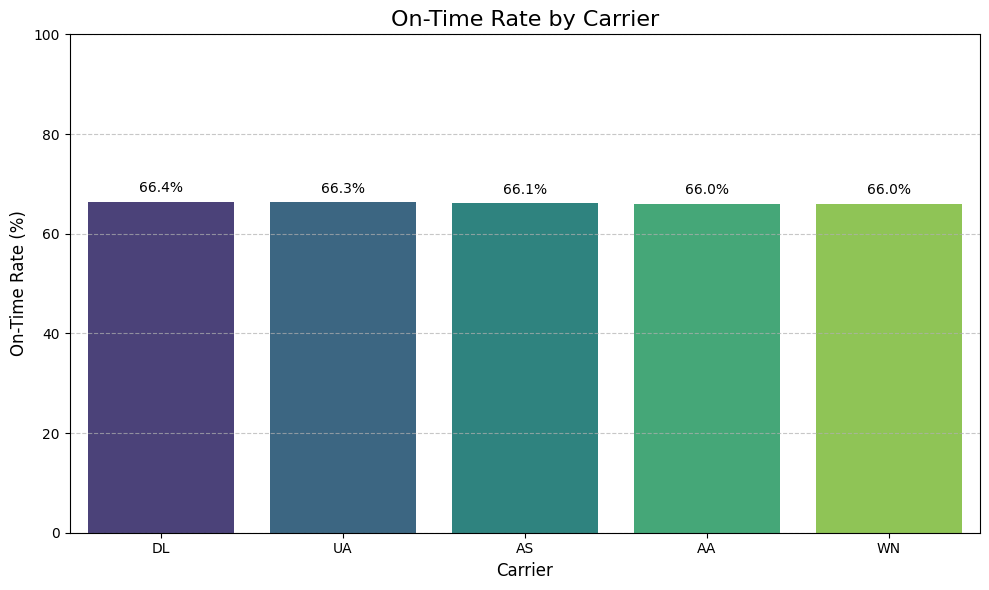

In [ ]:
# Prompt A: On-Time Rate by Carrier (Bar Chart)
on_time_rate = df_flights.groupby('carrier')['on_time'].mean().sort_values(ascending=False) * 100

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=on_time_rate.index, y=on_time_rate.values, palette='viridis')

plt.title('On-Time Rate by Carrier', fontsize=16)
plt.xlabel('Carrier', fontsize=12)
plt.ylabel('On-Time Rate (%)', fontsize=12)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add percentage labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', padding=5)

plt.tight_layout()
plt.show()

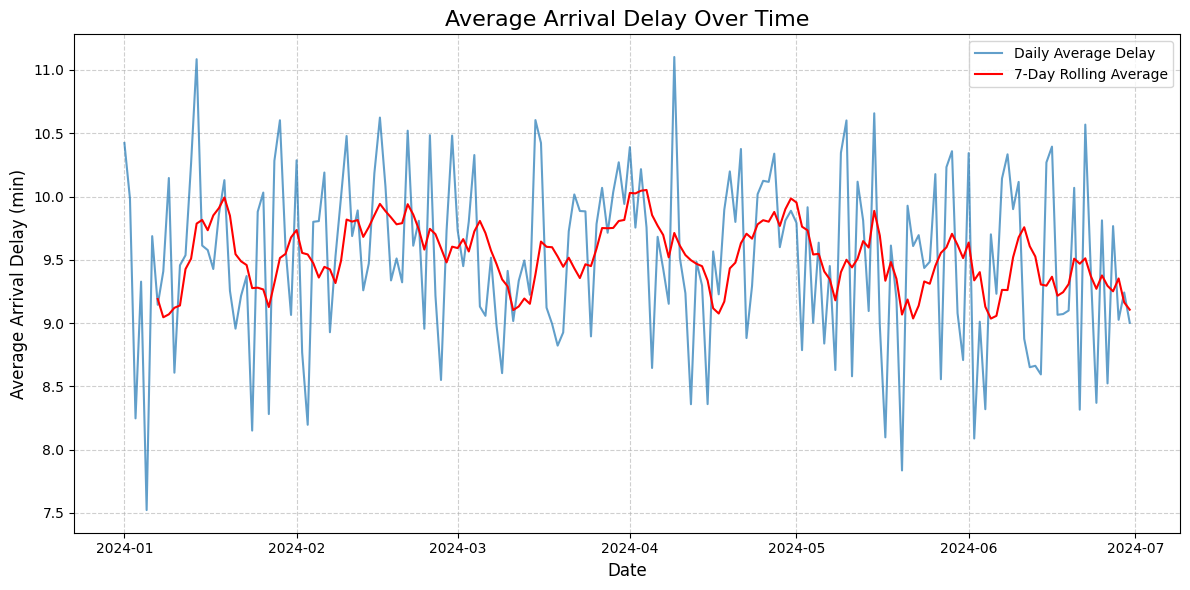

In [ ]:
# Prompt B: Average Arrival Delay over Time (Line Chart)
daily_avg_delay = df_flights.groupby('date')['arr_delay_min'].mean()
rolling_avg_delay = daily_avg_delay.rolling(window=7).mean()

plt.figure(figsize=(12, 6))
plt.plot(daily_avg_delay.index, daily_avg_delay.values, label='Daily Average Delay', alpha=0.7)
plt.plot(rolling_avg_delay.index, rolling_avg_delay.values, label='7-Day Rolling Average', color='red')

plt.title('Average Arrival Delay Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Arrival Delay (min)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

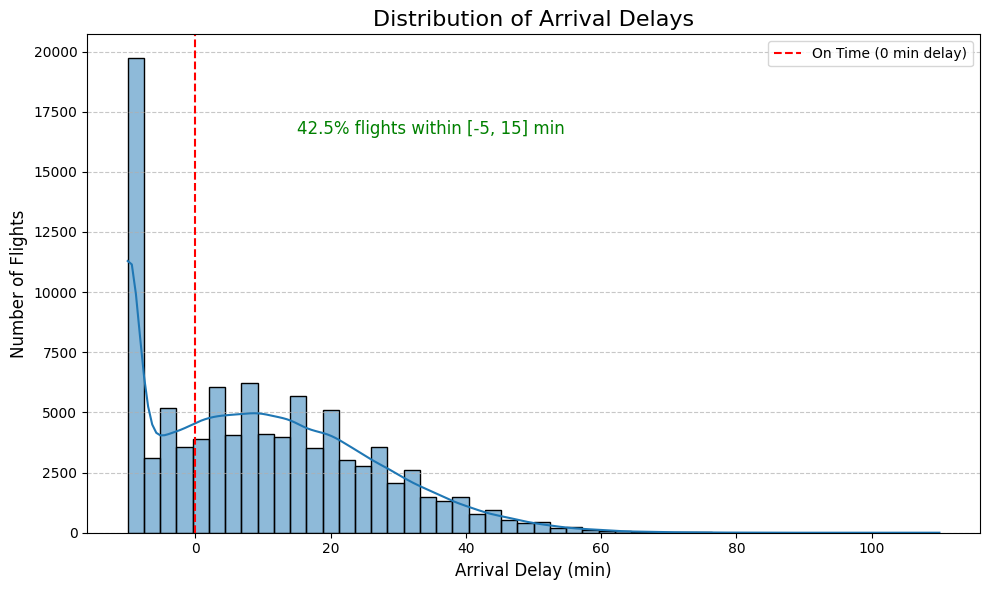

In [ ]:
# Prompt C: Delay Distribution (Histogram)
plt.figure(figsize=(10, 6))
sns.histplot(df_flights['arr_delay_min'], bins=50, kde=True)

plt.title('Distribution of Arrival Delays', fontsize=16)
plt.xlabel('Arrival Delay (min)', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add vertical line at 0
plt.axvline(0, color='red', linestyle='--', label='On Time (0 min delay)')

# Annotate percent of flights within [-5, 15] minutes
on_time_flights = df_flights[(df_flights['arr_delay_min'] >= -5) & (df_flights['arr_delay_min'] <= 15)]
on_time_percent = (len(on_time_flights) / len(df_flights)) * 100
plt.text(15, plt.ylim()[1] * 0.8, f'{on_time_percent:.1f}% flights within [-5, 15] min',
         horizontalalignment='left', color='green', fontsize=12)

plt.legend()
plt.tight_layout()
plt.show()

/tmp/ipython-input-2550672375.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=route_load_factor.values, y=route_labels, palette='viridis')


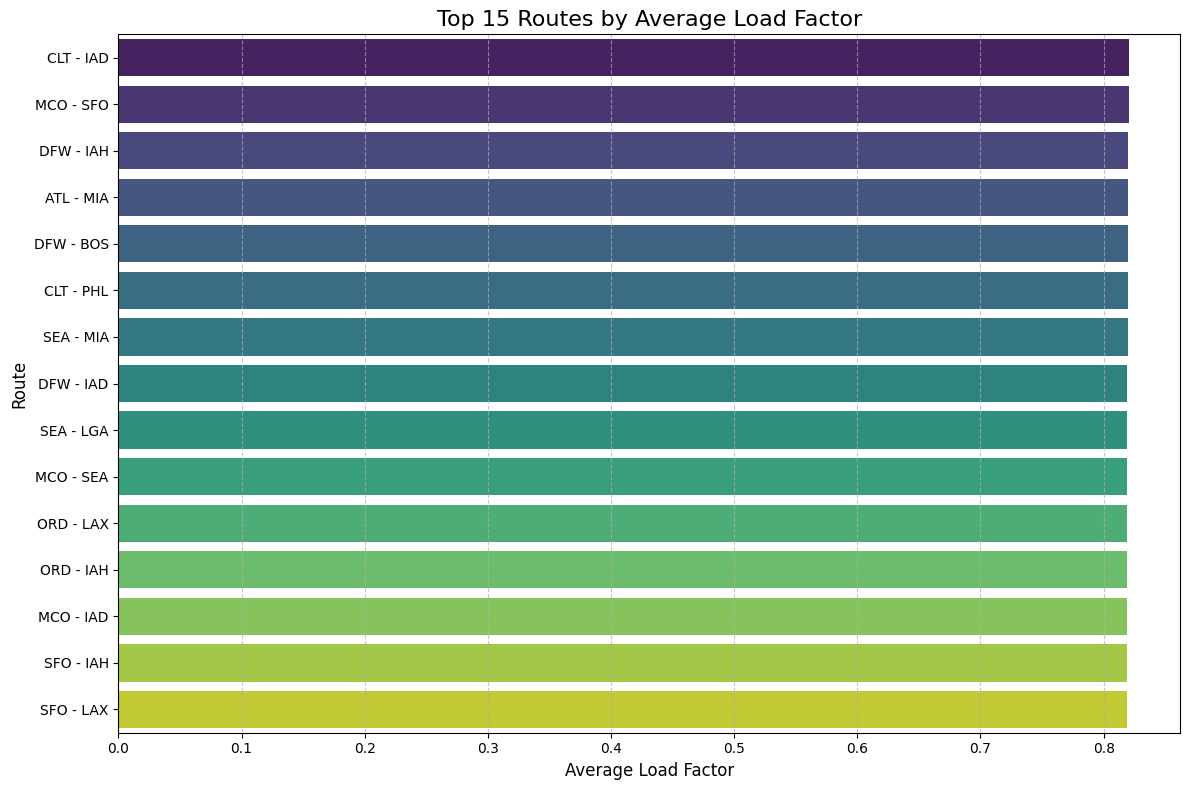

In [ ]:
# Prompt D: Load Factor by Route (Top 15) (Horizontal Bar)
route_load_factor = df_flights.groupby(['origin', 'dest'])['load_factor'].mean().sort_values(ascending=False).head(15)

# Convert MultiIndex to a list of strings for plotting
route_labels = [f"{origin} - {dest}" for origin, dest in route_load_factor.index]

plt.figure(figsize=(12, 8))
sns.barplot(x=route_load_factor.values, y=route_labels, palette='viridis')

plt.title('Top 15 Routes by Average Load Factor', fontsize=16)
plt.xlabel('Average Load Factor', fontsize=12)
plt.ylabel('Route', fontsize=12) # Changed label for clarity
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

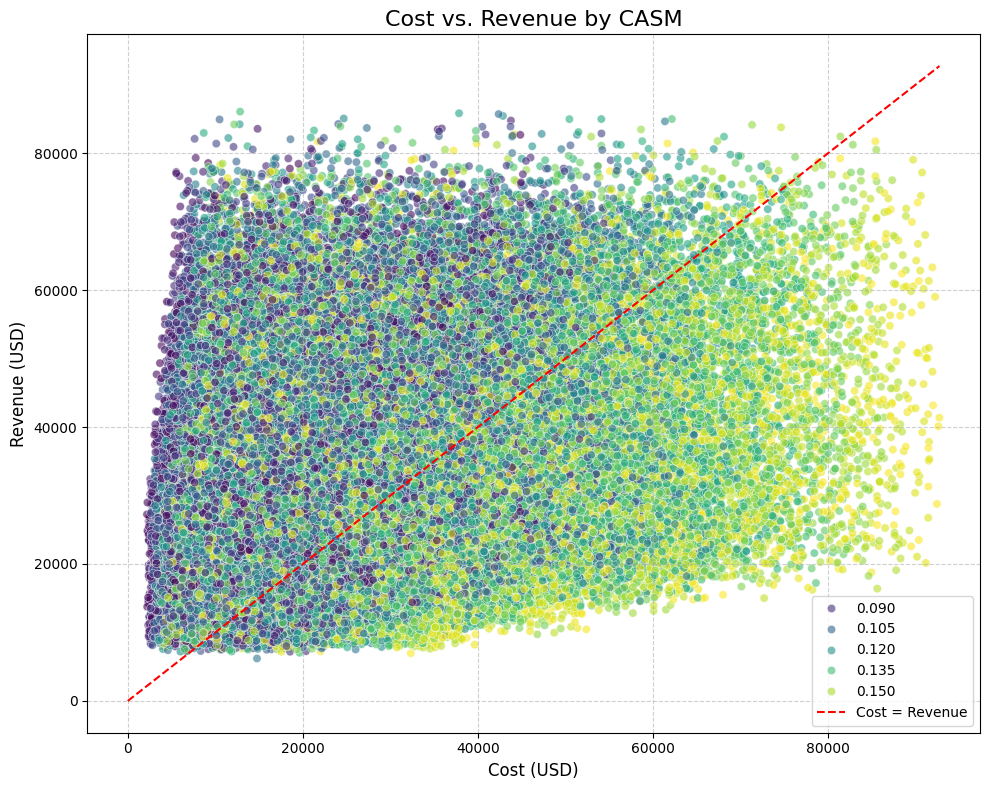

In [ ]:
# Prompt E — Cost vs. Revenue with CASM Coloring (Scatter)
plt.figure(figsize=(10, 8))
scatter = sns.scatterplot(data=df_flights, x='cost_usd', y='revenue_usd', hue='casm', palette='viridis', alpha=0.6)

plt.title('Cost vs. Revenue by CASM', fontsize=16)
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Revenue (USD)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

# Add a diagonal y=x reference line
max_val = max(df_flights['cost_usd'].max(), df_flights['revenue_usd'].max())
plt.plot([0, max_val], [0, max_val], color='red', linestyle='--', label='Cost = Revenue')

plt.legend()
plt.tight_layout()
plt.show()

### Export for Looker Studio
You can **export to CSV** and upload to Looker Studio, or you can **publish to BigQuery** and connect Looker Studio to that table.

#### Option 1 — Export CSV
Run one of the cells below to save a CSV in Colab, then download it or save to Drive.


In [ ]:
# Save synthetic dataset to CSV
df_flights.to_csv('airline_kpis_synthetic.csv', index=False)
print('📁 Saved: airline_kpis_synthetic.csv (download from the file browser on the left)')

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='directed-bongo-471119-d1')
table_id = 'directed-bongo-471119-d1.467_Lab_3.airline_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)

✅ Loaded to BigQuery: directed-bongo-471119-d1.467_Lab_3.airline_synthetic


#### Option 2 — Write to BigQuery (optional)
If you prefer Looker Studio → BigQuery:

```python
from google.cloud import bigquery
from google.oauth2 import service_account  # or use Colab auth

client = bigquery.Client(project='YOUR_PROJECT_ID')
table_id = 'YOUR_PROJECT_ID.YOUR_DATASET.airline_kpis_synthetic'
job = client.load_table_from_dataframe(df_flights, table_id)
job.result()
print('✅ Loaded to BigQuery:', table_id)
```

**In Looker Studio:**
1. Create → Report → Add data → **BigQuery**.  
2. Select your project/dataset/table.  
3. Add charts for each KPI and configure filters (carrier, route, month).


### Dashboard Wireframe (Design First)
Sketch your intended layout before building it in Looker Studio.

```
+-----------------------------------------------------------+
| Filters: Carrier [AA/DL/UA/WN/AS] | Month [Jan–Jun]       |
+-----------------------------------------------------------+
| KPI Cards: On-Time % | Avg Delay | Cancel % | Load Factor |
+-------------------------------+---------------------------+
| Line: Avg Delay over Time     | Bar: On-Time % by Carrier |
+-------------------------------+---------------------------+
| H-Bar: Top Routes by LF       | Scatter: Cost vs Revenue  |
+-----------------------------------------------------------+
```


## Reflection & Submission

**Short Reflection (3–5 sentences):** What design decision most improved your dashboard’s clarity? What would you change next?

📝 **Your response:**

Clear labels are the most important aspect for visualization clarity. Maintaining consistent spacing and alignment for all the charts makes it much more visually pleasing and easy to systematically assess the information. Using colors intentially to highlight differences and being reserved in the variety and quantity of color used also imporves readability. Next, I would focus on filtering to explore smaller segments of the data most relevant to a specific question or audience.
-

---
### Checklist
- [ ] Q1–Q3 answered in Tuesday section  
- [ ] 3–5 visualizations generated with **Gemini** in Colab  
- [ ] Synthetic or BigQuery data connected to **Looker Studio**  
- [ ] Dashboard with **filters** and **KPI cards**  
- [ ] Reflection complete  
